In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
from sklearn.tree import export_graphviz
from graphviz import Source
import os

dirname = os.path.dirname('__file__')
#dirname = os.path.dirname(os.path.abspath('__file__'))
print(dirname)

export_graphviz(
    tree_clf, out_file=os.path.join(dirname, "iris_tree.dot"), 
    feature_names=iris.feature_names[2:],
    rounded=True, filled=True
)

#Source.from_file(os.path.join(dirname, "iris_tree.dot"))

In [6]:
tree_clf.predict_proba([[5, 1.5]]) # petal length, width -> iris setosa (0/54), versicolor (49,54), virginica (5/54)

array([[0.        , 0.90740741, 0.09259259]])

## Parâmetros de regularização
1. max_depth: profundidade.
2. min_samples_split: número mínimo de amostras em um nó.
3. min_samples_leaf: número mínimo de amostras na folha.
4. min_weigth_fraction_leaf: número mínimo de amostras na folha expressado em fração do número total de instâncias ponderadas.
5. max_leaf_nodes: número máximo de folhas.
6. max_features: número máximo de features que são avaliadas em cada nó

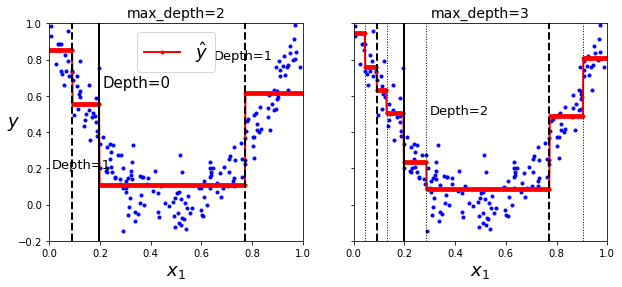

In [14]:
# Quadratic training set + noise
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()